In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [70]:
cars = pd.read_csv('Case_study_CarPrice_Assignment.csv') 
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [71]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Nhận thấy chưa có cột company

In [72]:
companies = cars['CarName'].apply(lambda x: x.split(' ')[0])
companies.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Có một số lỗi nhập liệu

In [73]:
cars.insert(3,'company',companies)
cars.head()

,car_ID,symboling,CarName,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
def replace_name(after, before):
    for i in range(0,len(after)):
        a = after[i]
        b = before[i]
        cars.company.replace(b,a,inplace=True)

In [75]:
b = ['maxda','porcshce','toyouta','vokswagen','vw']
a = ['mazda','porsche','toyota','volkswagen','volkswagen']
replace_name(a,b)
print(cars.company.unique())
print(f'Sau khi sử lý còn lại {len(cars.company.unique())} hãng xe')

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Sau khi sử lý còn lại 23 hãng xe


In [76]:
count = 0
for isdup in cars.duplicated():
    if isdup:
        print (count,isdup,sep='\t')
    count +=1

- Không có hàng nào trùng nhau

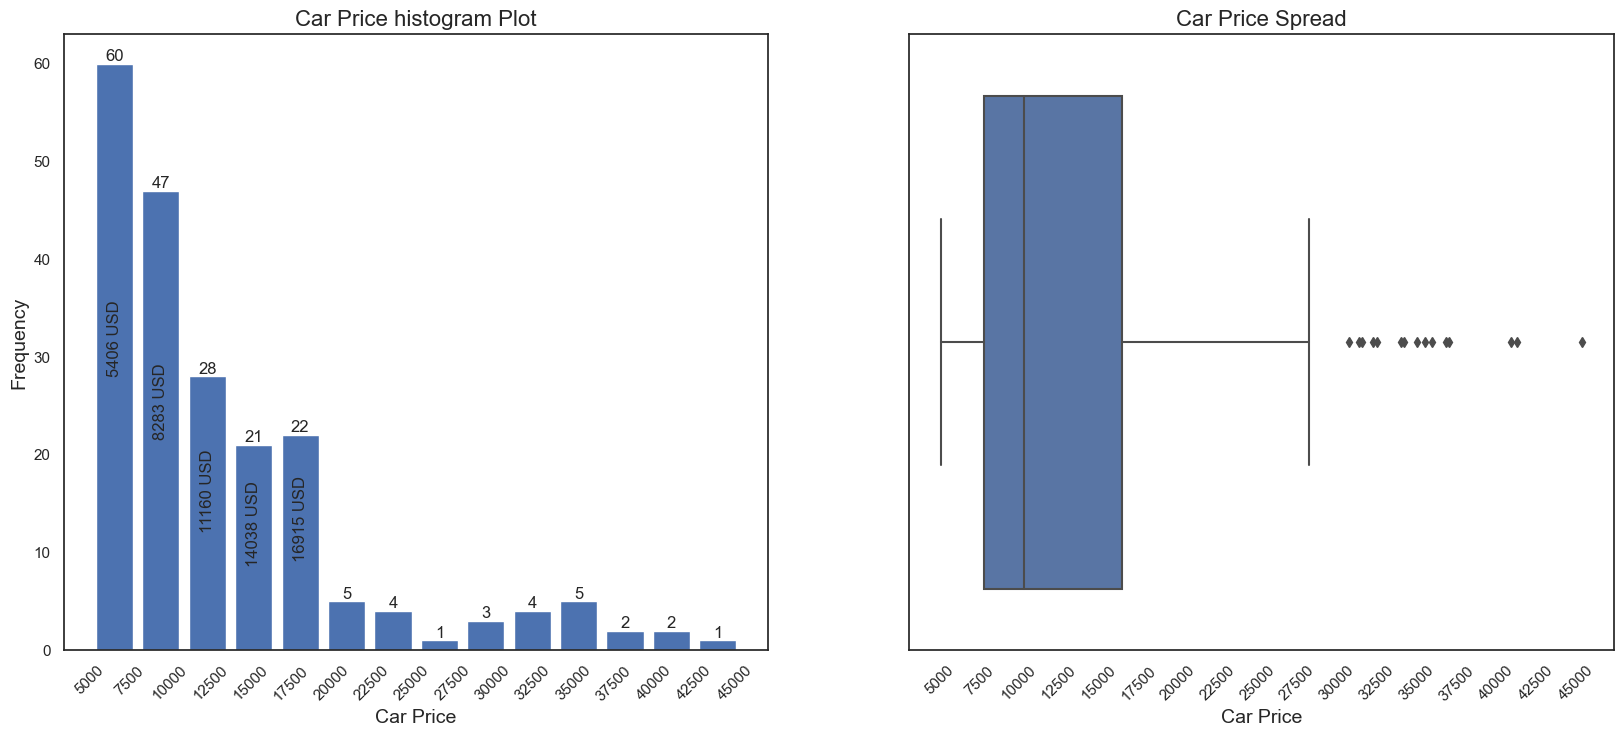

In [82]:
sns.set_theme(style = 'white')

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price histogram Plot',fontsize = 16)
n, bins, patches = plt.hist(cars.price,bins = 14,rwidth = 0.8,align='mid')
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()
    v = patch.get_x()
    plt.text(patch.get_x() + patch.get_width()/2, height, str(int(height)), ha='center', va='bottom')
    if height>20:
        plt.text(patch.get_x() + patch.get_width()/2, height/2-2, str(int(round(v,0))) + ' USD', ha='center', va='bottom',rotation=90)

plt.subplot(1,2,2) 
plt.title('Car Price Spread',fontsize = 16) 
sns.boxplot(x=cars.price)
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.show()

In [78]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

- Độ lệch chuẩn ~ 8000 USD/chiếc
- Giá trung bình khoảng 13000 USD/ chiếc
- Tập trung ở phân khúc giá rẻ nhiều (5000-10000 USD/chiếc)
- Phân khúc tầm trung khoảng 10000-20000 USD/chiếc

In [89]:
car_count = cars.company.value_counts().to_dict()
v = cars.groupby(['company','fueltype'])['fueltype'].count().to_dict()
di_dict = {}
gas_dist = {}
for i in v.keys():
    if i[1] == 'diesel':
        di_dict[i[0]] = v.get(i)
    else:
        if i[0] not in list(di_dict.keys()):
            di_dict[i[0]] = 0

    if i[1] == 'gas':
        gas_dist[i[0]] = v.get(i)
    else:
        if i[0] not in list(gas_dist.keys()):
            gas_dist[i[0]] = 0

list_company = list(car_count.keys())
di_dict = {i : di_dict[i] for i in list_company}
gas_dist = {i : gas_dist[i] for i in list_company}

['toyota', 'mazda', 'nissan', 'mitsubishi', 'honda', 'volkswagen', 'subaru', 'peugeot', 'volvo', 'dodge', 'buick', 'bmw', 'audi', 'plymouth', 'saab', 'porsche', 'isuzu', 'jaguar', 'chevrolet', 'alfa-romero', 'renault', 'mercury', 'Nissan']
[32, 17, 17, 13, 13, 12, 12, 11, 11, 9, 8, 8, 7, 7, 6, 5, 4, 3, 3, 3, 2, 1, 1]


TypeError: 'tuple' object is not callable

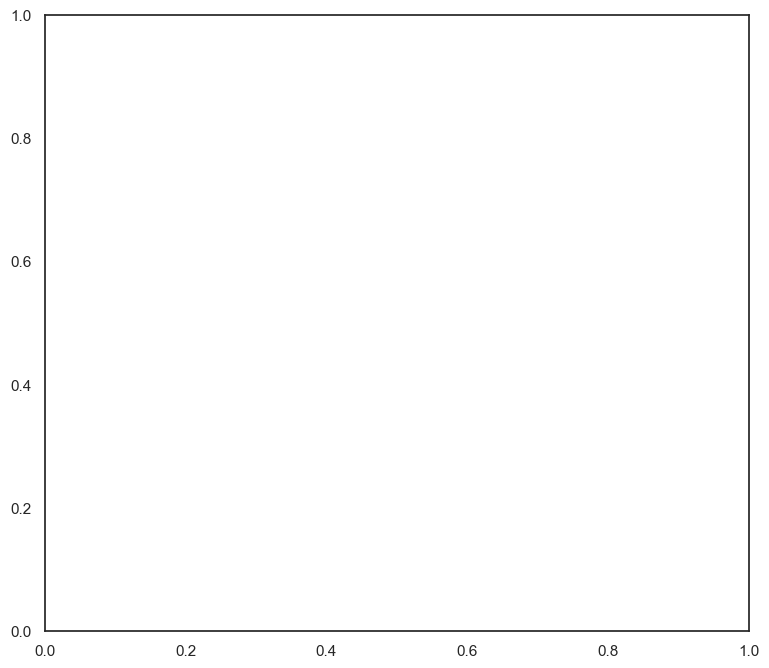

In [96]:
car_count = cars.company.value_counts().to_dict()
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 

x = list(car_count.keys())
y = list(car_count.values())
print(x)
print(y)
pathcher = plt.bar(x,y,alpha = 0.5)
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.plot(list(car_count.keys()),list(di_dict.values()),label = 'diesel',color='r',marker = '*')
plt.plot(list(car_count.keys()),list(gas_dist.values()),label = 'gas',color='b',marker = '*')
plt.title('Frequency distribution chart',fontsize = 16)
plt.xlabel('Company',fontsize = 14)
plt.xticks(rotation=45)
plt.ylabel('Frequency',fontsize = 14)
plt.legend(fontsize = 14,loc = 'upper right')

plt.subplot(1,2,2) 
carbody_count = cars.carbody.value_counts().to_dict()
pathcher =plt.bar(list(carbody_count.keys()),list(carbody_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.title('Frequency distribution chart',fontsize = 16)
plt.xlabel('Car body',fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)
plt.show()


In [ ]:
carbody_ser = cars.groupby(['carbody'])['price'].mean().sort_values()
company_ser = cars.groupby(['company'])['price'].mean().sort_values()
fueltype_ser = cars.groupby(['fueltype'])['price'].mean().sort_values()

['hatchback', 'wagon', 'sedan', 'convertible', 'hardtop']

In [ ]:
def show_barchart(seri,chartname,xlabel,ylabel,rotation = 0):
    plt.bar(list(seri.index),list(seri.values))
    plt.title(chartname,fontsize = 16)
    plt.xlabel(xlabel,fontsize = 14)
    plt.ylabel(ylabel,fontsize = 14)
    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
show_barchart(carbody_ser,'Carbody vs Average price','','')
show_barchart(company_ser,'Company vs Average price','','',45)
show_barchart(fueltype_ser,'Fueltype vs Average price','','')

TypeError: 'tuple' object is not callable

- Toyota là hãng xe chiếm thị phần cao nhất.
- Loại thân xe Sedan, hatchback bán chạy nhất.
- Xe sử dụng loại nhiên liệu gas bán chạy hơn nhiều so với xe sử dụng loại nhiên liệu diesel

TypeError: 'tuple' object is not callable

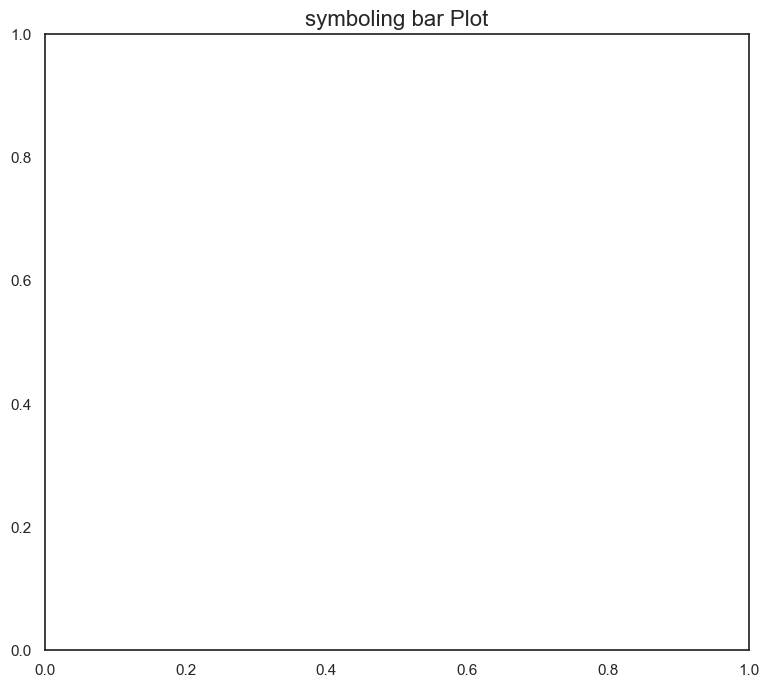

In [81]:
sns.set_theme(style = 'white')

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('symboling bar Plot',fontsize = 16)
symbol_count = cars.symboling.value_counts().to_dict()
pathcher =plt.bar(list(symbol_count.keys()),list(symbol_count.values()))
for i in pathcher:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2,
             str((i.get_height())),
             fontsize = 12)
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)


plt.subplot(1,2,2) 
plt.title('Car Price Spread',fontsize = 16) 
sns.boxplot(x=cars.symboling,y=cars.price)
plt.yticks([i for i in range(5000,47500,2500)])
plt.xlabel('Symboling',fontsize = 14)
plt.ylabel('Car Price',fontsize = 14)
plt.show()